<a href="https://colab.research.google.com/github/izharul-haque/BMI_Calculator/blob/master/BMI_Calculator_code_09092022_IzharulHaque.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BMI Calculator**

**Problem Statement** 

*Given the following JSON data*

[{"Gender": "Male", "HeightCm": 171, "WeightKg": 96 },

{ "Gender": "Male", "HeightCm": 161, "WeightKg": 85 },

{ "Gender": "Male", "HeightCm": 180, "WeightKg": 77 },

{ "Gender": "Female", "HeightCm": 166, "WeightKg": 62},

{"Gender": "Female", "HeightCm": 150, "WeightKg": 70},

{"Gender": "Female", "HeightCm": 167, "WeightKg": 82}]

as the input with weight and height parameters of a person, we have to perform the following:

1) Calculate the BMI (Body Mass Index) using Formula 1, BMI Category and Health risk from Table 1 of the person and add them as 3 new columns

2) Count the total number of overweight people using ranges in the column BMI Category of Table 1, check this is consistent programmatically and add any other observations in the documentation

3) Create build, tests to make sure the code is working as expected and this can later be added to an automation build / testing / deployment pipeline

4) Write a solid production-grade Python3 Program to solve this problem, imagine this will be used in-product for 1 million patients. We are only interested in a standalone backend application, we are NOT expecting a UI, webpage, frontend, Mobile App, microsite, docker, web app etc. Simple and clean solution. Feel free to explore and use the standard Python libraries or any open source Python modules

5) Check in the documentation, configuration, code and tests into github and please email us the link with the URL pattern
https://www.github.com/<owner>/code-<date>-<your fullname> and do NOT
use Vamstar in URL, title or description. e.g. for me it could be
https://www.github.com/richard/code-20200917-richardfreeman

Formula 1 - BMI

BMI(kg/m2) = mass(kg) / height(m)2

The BMI (Body Mass Index) in (kg/m2) is equal to the weight in kilograms (kg) divided by your height in meters squared (m)

In [366]:
# importing drive to upload dataset
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [368]:
# Original Json dataset
BMI_table = [{"Gender": "Male", "HeightCm": 171, "WeightKg": 96 },
{ "Gender": "Male", "HeightCm": 161, "WeightKg": 85 },
{ "Gender": "Male", "HeightCm": 180, "WeightKg": 77 },
{ "Gender": "Female", "HeightCm": 166, "WeightKg": 62},
{"Gender": "Female", "HeightCm": 150, "WeightKg": 70},
{"Gender": "Female", "HeightCm": 167, "WeightKg": 82}]

#### **Data converted from json to excel format**

In [367]:
import pandas as pd
data = pd.read_excel('/content/gdrive/MyDrive/BMI Calculator/data.xlsx')
data

,Gender,HeightCm,WeightKg
0,Male,171,96
1,Male,161,85
2,Male,180,77
3,Female,166,62
4,Female,150,70
5,Female,167,82


BMI Category BMI Range (kg/m2) Health risk
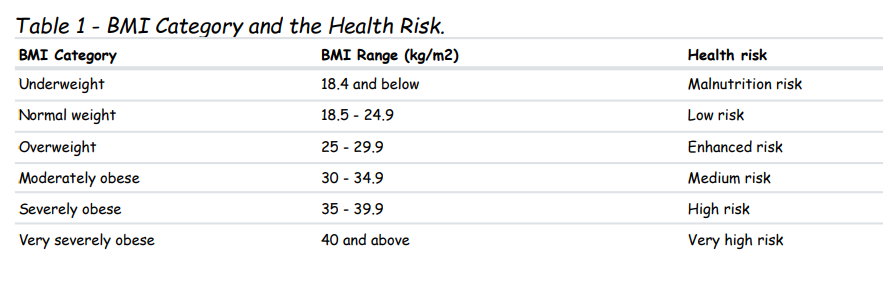

### **BMI Calculator**

In [396]:
# Let's Create BMI Calculator based on the above given BMI Category

height = float(input("Please enter your height(cm):  ")) / 100
weight = float(input("Please enter your weight(kg):  "))
print('-------------------------------------------------')


BMI = round((weight/(height ** 2)), 2)

print(f"*BMI Calculated is:  ",BMI)
 
if(BMI>0):
    if(BMI<=18.4):
        print(f"*You're Underweight and Malnutrition risk.")
    elif(BMI<=24.9):
        print(f"*Congrats! You've Normal Weight with Low health risk.")
    elif(BMI<=29.9):
        print(f"*You're Overweight and has Enhanced risk.")
    elif(BMI<=34.9):
        print(f"*You're Moderately Obese and have medium health risk.")
    elif(BMI<=39.9):
        print(f"*You're Severely Obese and have High health risk.")
    else: 
        print(f"*You are very Severely Obese and have very High health risk")
else:
    print("Enter valid details")

Please enter your height(cm):  173
Please enter your weight(kg):  80
-------------------------------------------------
*BMI Calculated is:   26.73
*You're Overweight and has Enhanced risk.


In [371]:
BMI_table

[{'Gender': 'Male', 'HeightCm': 171, 'WeightKg': 96},
 {'Gender': 'Male', 'HeightCm': 161, 'WeightKg': 85},
 {'Gender': 'Male', 'HeightCm': 180, 'WeightKg': 77},
 {'Gender': 'Female', 'HeightCm': 166, 'WeightKg': 62},
 {'Gender': 'Female', 'HeightCm': 150, 'WeightKg': 70},
 {'Gender': 'Female', 'HeightCm': 167, 'WeightKg': 82}]

### **Adding a new column to dataset to calculate BMI**

In [385]:
data['BMI_Range'] = round(data['WeightKg'] / (data['HeightCm']**2)*10000,1)

In [386]:
# checking the head of the dataset
data.head()

,Gender,HeightCm,WeightKg,BMI_Range
0,Male,171,96,32.8
1,Male,161,85,32.8
2,Male,180,77,23.8
3,Female,166,62,22.5
4,Female,150,70,31.1


In [389]:
# creating a blank series to insert value

BMI_Category =pd.Series([])
Health_Risk =pd.Series([])

for i in range(len(data)):
    if data["BMI_Range"][i] <=18.4:
        BMI_Category[i]="Underweight"
        Health_Risk[i]="Malnutrition Risk"
 
    elif data["BMI_Range"][i] <=24.9:
        BMI_Category[i]="Normal"
        Health_Risk[i]="Malnutrition Risk"
 
    elif data["BMI_Range"][i] <=29.9:
        BMI_Category[i]="Overweight"
        Health_Risk[i]="Enhanced Risk"

    elif data["BMI_Range"][i] <=34.9:
        BMI_Category[i]="Moderately Obese"
        Health_Risk[i]="Medium Risk"

    elif data["BMI_Range"][i] <=39.9:
        BMI_Category[i]="Severely Obese"
        Health_Risk[i]="High Risk"
    
    elif data["BMI_Range"][i] >40:
        BMI_Category[i]="Very Severely Obese"
        Health_Risk[i]="Very High Risk"
 
    else:
        BMI_Category[i]= data["BMI_Range"][i]
        Health_Risk[i]=data["BMI_Range"][i]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys


In [390]:
# inserting a new column to the dataset for the values above stored
data.insert(3, "BMI Category", BMI_Category)
data.insert(5, "Health Risk", Health_Risk)

In [397]:
# final dataset
data.head(6)

,Gender,HeightCm,WeightKg,BMI Category,BMI_Range,Health Risk
0,Male,171,96,Moderately Obese,32.8,Medium Risk
1,Male,161,85,Moderately Obese,32.8,Medium Risk
2,Male,180,77,Normal,23.8,Malnutrition Risk
3,Female,166,62,Normal,22.5,Malnutrition Risk
4,Female,150,70,Moderately Obese,31.1,Medium Risk
5,Female,167,82,Overweight,29.4,Enhanced Risk


In [393]:
# dataset data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        6 non-null      object 
 1   HeightCm      6 non-null      int64  
 2   WeightKg      6 non-null      int64  
 3   BMI Category  6 non-null      object 
 4   BMI_Range     6 non-null      float64
 5   Health Risk   6 non-null      object 
dtypes: float64(1), int64(2), object(3)
memory usage: 416.0+ bytes
